In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matrix import *

def plot_data(data, name, annotate=True):
    num_unique_values = len(np.unique(data))
    boundaries = np.linspace(np.min(data), np.max(data), num=num_unique_values + 1)
    cmap = plt.get_cmap('viridis', len(boundaries) - 1)
    norm = BoundaryNorm(boundaries, cmap.N, clip=False)

    fig, ax = plt.subplots()
    cax = ax.imshow(data, cmap=cmap, norm=norm)

    # Add text annotations for each pixel
    if annotate:
        for i in range(data.shape[0]):
            for j in range(data.shape[1]):
                ax.text(j, i, f'{data[i, j]}', va='center', ha='center', color='w')

    # Create a colorbar with discrete values
    cbar = fig.colorbar(cax, cmap=cmap, norm=norm, ticks=boundaries[1:], format='%d')

    plt.title(name)
    plt.show()

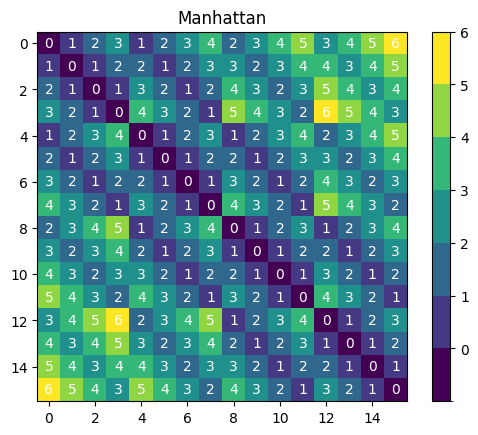

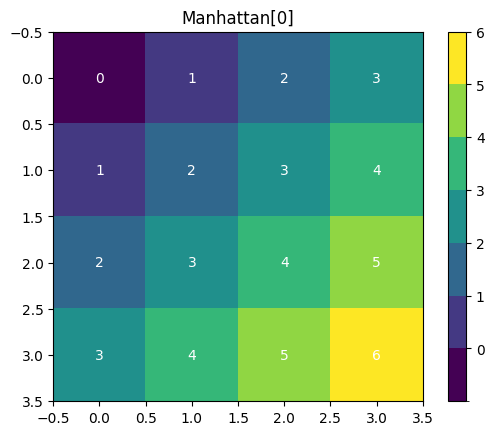

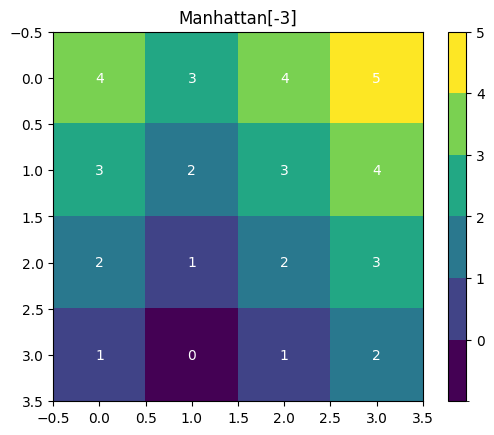

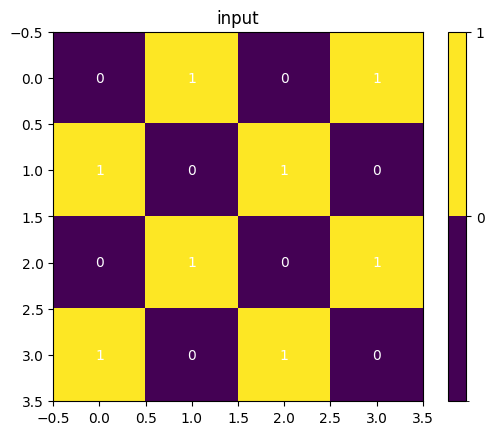

In [6]:


N = 4
r = 6

man = distance_manhattan(N)
# wrap = distance_wrapped(N)
filter_man = np.where(man > r, 0, man)
# filter_wrap = np.where(wrap > r, 0, wrap)

# print(wrap[0])

alternating = np.zeros((N, N), dtype=int)
alternating[1::2, ::2] = 1
alternating[::2, 1::2] = 1

plot_data(filter_man, "Manhattan")
plot_data(filter_man[0].reshape((N,N)), "Manhattan[0]")
plot_data(filter_man[-3].reshape((N,N)), "Manhattan[-3]")
plot_data(alternating, "input")
# plot_data(filter_wrap, "Wrapped manhattan")

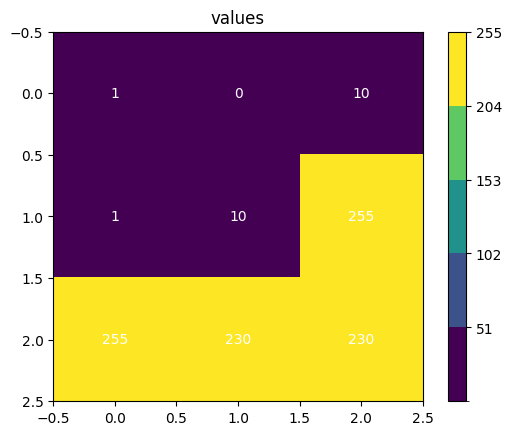

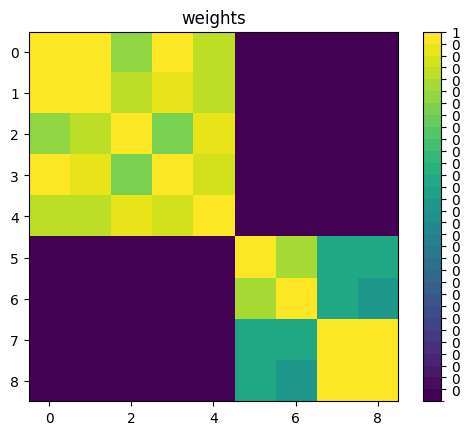

In [12]:
values = np.array([[1,0,10],
                  [1,10,255],
                  [255,230,230]])

weights = dissimilarity(values/255) # normalization is a must, otherwise infintessimally small values (using the nc weight scheme at least)

plot_data(values, 'values')
plot_data(weights, 'weights', annotate=False)
# plot_data(weights[0].reshape(values.shape), 'weights[0]', annotate=False)
# plot_data(weights[3].reshape(values.shape), 'weights[3]', annotate=False)
# plot_data(weights[-3].reshape(values.shape), 'weights[-3]', annotate=False)